# Evaluate Text Similarity of Amazon Book Title Search and Google Search
   By Heidi Nguyen

<a id="top"></a>

# Table of Contents 

- [I. Evaluate Text Similarity of Amazon Book Search Results](#AMZbook)

- [II. Evaluate Text Similarity Using Google Search Engine](#query)

- [III. **Summary of Results**](#resultHW6)



In [2]:
# libraries
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter
import os # to set wd # # os.environ['KERAS_BACKEND']='tensorflow' for keras
import re

# get time stamp
import time
# import Image
from IPython.display import Image

# BeautifulSoup 
from bs4 import BeautifulSoup
import  codecs # that’s to take care of things like accented characters, which are represented in different ways on

# lxml 
from lxml import html
import requests 

# Keras 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score
from keras import optimizers

# access keyboard shortcuts: Esc + H
# Mac: Cmd + Shift + P ==> private browsing => Firefox does not track 
# Linux and Windows: or Ctrl + Shift + P on Linux and Windows

# Set wd
path = "/Volumes/NO NAME/Data Science/2018-0826 MSDS 7337 Natural Language Processing/Unit 10/hw6/"
os.chdir(path)
print (os.getcwd()); # Prints the working directory



Using TensorFlow backend.


/Volumes/NO NAME/Data Science/2018-0826 MSDS 7337 Natural Language Processing/Unit 10/hw6


In [3]:
try:
    import scrapy
    print (scrapy.__version__)
    
except:
    !pip install scrapy
    import scrapy
from scrapy.crawler import CrawlerProcess

1.5.1


In [4]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'2.7.14'

<a id="AMZbook"></a>

# Evaluate Text Similarity of Amazon Book Search Results

1. Evaluate text similarity of Amazon book search results by doing the following:
        
        a. Do a book search on Amazon. Manually copy the full book title (including subtitle) of
        each of the top 24 books listed in the first two pages of search results.
        
        b. In Python, run one of the text-similarity measures covered in this course, e.g., cosine
        similarity. Compare each of the book titles, pairwise, to every other one.
        
        c. Which two titles are the most similar to each other? Which are the most dissimilar?
        Where do they rank, among the first 24 results?

 <a href="#top">Back to top</a>


**In this section, I'm comparing the similarities between each book title from Amazon book search result. 
I'm going to extract features from document using and vectorize documents using their TF-IDFs similarly.** 

**Once we have the vector representations of the various documents, we will compute document similarity of the book title collection to one another using  Cosine similarity metrics:**
        


In [5]:
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from HTMLParser import HTMLParser
import unicodedata

def unescape_html(parser, text):

    return parser.unescape(text)
        
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)
        
def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()


In [6]:
# Use the following items in the map
CONTRACTION_MAP = {
"ain\'t": "is not",
"aren\'t": "are not",
"can\'t": "cannot",
"can\'t\'ve": "cannot have",
"\'cause": "because",
"could\'ve": "could have",
"couldn\'t": "could not",
"couldn\'t\'ve": "could not have",
"didn\'t": "did not",
"doesn\'t": "does not",
"don\'t": "do not",
"hadn\'t": "had not",
"hadn\'t\'ve": "had not have",
"hasn\'t": "has not",
"haven\'t": "have not",
"he\'d": "he would",
"he\'d\'ve": "he would have",
"he\'ll": "he will",
"he\'ll\'ve": "he he will have",
"he\'s": "he is",
"how\'d": "how did",
"how\'d\'y": "how do you",
"how\'ll": "how will",
"how\'s": "how is",
"I\'d": "I would",
"I\'d\'ve": "I would have",
"I\'ll": "I will",
"I\'ll\'ve": "I will have",
"I\'m": "I am",
"I\'ve": "I have",
"i\'d": "i would",
"i\'d\'ve": "i would have",
"i\'ll": "i will",
"i\'ll\'ve": "i will have",
"i\'m": "i am",
"i\'ve": "i have",
"isn\'t": "is not",
"it\'d": "it would",
"it\'d\'ve": "it would have",
"it\'ll": "it will",
"it\'ll\'ve": "it will have",
"it\'s": "it is",
"let\'s": "let us",
"ma\'am": "madam",
"mayn\'t": "may not",
"might\'ve": "might have",
"mightn\'t": "might not",
"mightn\'t\'ve": "might not have",
"must\'ve": "must have",
"mustn\'t": "must not",
"mustn\'t\'ve": "must not have",
"needn\'t": "need not",
"needn\'t\'ve": "need not have",
"o\'clock": "of the clock",
"oughtn\'t": "ought not",
"oughtn\'t\'ve": "ought not have",
"shan\'t": "shall not",
"sha\'n\'t": "shall not",
"shan\'t\'ve": "shall not have",
"she\'d": "she would",
"she\'d\'ve": "she would have",
"she\'ll": "she will",
"she\'ll\'ve": "she will have",
"she\'s": "she is",
"should\'ve": "should have",
"shouldn\'t": "should not",
"shouldn\'t\'ve": "should not have",
"so\'ve": "so have",
"so\'s": "so as",
"that\'d": "that would",
"that\'d\'ve": "that would have",
"that\'s": "that is",
"there\'d": "there would",
"there\'d\'ve": "there would have",
"there\'s": "there is",
"they\'d": "they would",
"they\'d\'ve": "they would have",
"they\'ll": "they will",
"they\'ll\'ve": "they will have",
"they\'re": "they are",
"they\'ve": "they have",
"to\'ve": "to have",
"wasn\'t": "was not",
"we\'d": "we would",
"we\'d\'ve": "we would have",
"we\'ll": "we will",
"we\'ll\'ve": "we will have",
"we\'re": "we are",
"we\'ve": "we have",
"weren\'t": "were not",
"what\'ll": "what will",
"what\'ll\'ve": "what will have",
"what\'re": "what are",
"what\'s": "what is",
"what\'ve": "what have",
"when\'s": "when is",
"when\'ve": "when have",
"where\'d": "where did",
"where\'s": "where is",
"where\'ve": "where have",
"who\'ll": "who will",
"who\'ll\'ve": "who will have",
"who\'s": "who is",
"who\'ve": "who have",
"why\'s": "why is",
"why\'ve": "why have",
"will\'ve": "will have",
"won\'t": "will not",
"won\'t\'ve": "will not have",
"would\'ve": "would have",
"wouldn\'t": "would not",
"wouldn\'t\'ve": "would not have",
"y\'all": "you all",
"y\'all\'d": "you all would",
"y\'all\'d\'ve": "you all would have",
"y\'all\'re": "you all are",
"y\'all\'ve": "you all have",
"you\'d": "you would",
"you\'d\'ve": "you would have",
"you\'ll": "you will",
"you\'ll\'ve": "you will have",
"you\'re": "you are",
"you\'ve": "you have"
}
# Expand Contractions Function
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
    

In [7]:
# 
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get',
                                 'tell', 'listen', 'one', 'two', 'three',
                                 'four', 'five', 'six', 'seven', 'eight',
                                 'nine', 'zero', 'join', 'find', 'make',
                                 'say', 'ask', 'tell', 'see', 'try', 'back',
                                'also']

def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [8]:
from HTMLParser import HTMLParser
html_parser = HTMLParser()

# for normalize_corpus function
# Remove Accented characters, use NFKD option here 
def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD',text.decode('utf-8')).encode('ascii', 'ignore')
    return text

# Annotate text tokens with POS tags

from pattern.en import tag
from nltk.corpus import wordnet as wn

def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    
    tagged_text = tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

# lemmatize text based on POS tags   
wnl = WordNetLemmatizer()
def lemmatize_text(text):
    
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


In [9]:
from HTMLParser import HTMLParser
html_parser = HTMLParser()
import unicodedata

# from normalization import normalize_corpus
# from utils import build_feature_matrix

# normalize_corpus function 
def normalize_corpus(corpus, lemmatize=True, 
                     only_text_chars=False,
                     tokenize=False):
    
    normalized_corpus = []    
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html_parser.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, CONTRACTION_MAP)
        if lemmatize:
            text = lemmatize_text(text)
        else:
            text = text.lower()
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
            
    return normalized_corpus



In [10]:
## Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency',
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0):

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                     ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix


# Cosine Similarity

We will define a function that will take in the vectorized corpus of any 2 documents which we want to compute similarities. We will get the similarity scores using the dot product operation and finally we will sort them in reverse order and get the top n documents with the highest similarity score. We can display n most similar documents where n is a user input parameter. 

For our case, we will compare our tiltle corpus to itself get pairwas similarity of the titles in the documents,


In [11]:
def compute_cosine_similarity(doc_features, corpus_features,
                              top_n=3):
    # get document vectors
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    # compute similarities
    similarity = np.dot(doc_features,
                        corpus_features.T)
    # get docs with highest similarity scores
    top_docs = similarity.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(similarity[index], 3))
                            for index in top_docs]
    return top_docs_with_score


In [66]:
# read the data to dataframe
book_title = pd.read_csv("AmazonBookResult_cleaned.csv", encoding='ascii') # 'ascii', encoding='utf-8'
book_title.head()
book_title.info()

# pull all the titles into an array: 
arr_title = np.array(book_title['Title'])
arr_title 


,Title
0,Little Women (Puffin in Bloom) by Louisa May A...
1,The Complete Sherlock Holmes (Knickerbocker Cl...
2,Pride and Prejudice by Jane Austen and Tony Ta...
3,Jane Austen: The Complete Works 7-Book Boxed S...
4,Winnie-the-Pooh: Classic Gift Edition by A. A....


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
Title    24 non-null object
dtypes: object(1)
memory usage: 264.0+ bytes


array([u'Little Women (Puffin in Bloom) by Louisa May Alcott',
       u'The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle',
       u'Pride and Prejudice by Jane Austen and Tony Tanner',
       u'Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith',
       u'Winnie-the-Pooh: Classic Gift Edition by A. A. Milne and Ernest H. Shepard',
       u'Wuthering Heights (Penguin Classics) by Emily Bront and Pauline Nestor',
       u"Anne of Green Gables, Complete 8-Book Box Set: Anne of Green Gables; Anne of the Island; Anne of Avonlea; Anne of Windy Poplar; Anne's House of ... Ingleside; Rainbow Valley; Rilla of Ingleside by L. M. Montgomery",
       u'The Wind in the Willows (Sterling Illustrated Classics) by Kenneth Grahame and Robert Ingpen',
       u'Denim and Diamonds: A Novel (Debbie Macomber Classics) by Debbie Macomber',
       u'Jane Eyre (Bantam Classics) by Charlotte 

In [67]:
# normalize the whole title dataset
norm_arr_title = normalize_corpus(arr_title,lemmatize=True) # # only_text_chars=True, not keep only text characters
# norm_arr_title
# extract features from the title corpus
tfidf_vectorizer, tfidf_features = build_feature_matrix(norm_arr_title,
                                                        feature_type='tfidf',
                                                        ngram_range=(1, 1),
                                                        min_df=0.0, max_df=1.0)
# print tfidf_features.shape

In [68]:
# because we compute pairwise similarity of the same title corpus, we will treat it as following: 
# normalize and extract features from the title corpus based on its own if-idf vector
# norm_query_docs =  normalize_corpus(query_docs, lemmatize=True)
query_docs1 = arr_title
query_docs1_tfidf = tfidf_vectorizer.transform(norm_arr_title)# transform itself 


In [69]:
# get Cosine similarity results for our example documents

print 'Document Similarity Analysis using Cosine Similarity'
print '='*60

for index, doc in enumerate(query_docs1): # 
    doc_tfidf = query_docs1_tfidf[index] 
    top_similar_docs = compute_cosine_similarity(doc_tfidf,
                                         tfidf_features,
                                         top_n=30) # top 30, all the corpus
print 'Document',index+1 ,':', doc
print 'Top', len(top_similar_docs), 'similar docs:'
print '-'*40

for doc_index, sim_score in top_similar_docs:
    print 'Doc num: {} Similarity Score: {}\nDoc: {}'.format(doc_index+1, sim_score, arr_title[doc_index]) # compared to itself 

    print '-'*40
print
        

Document Similarity Analysis using Cosine Similarity
Document 24 : The Adventures of Huckleberry Finn (Bantam Classic) by Mark Twain
Top 24 similar docs:
----------------------------------------
Doc num: 24 Similarity Score: 1.0
Doc: The Adventures of Huckleberry Finn (Bantam Classic) by Mark Twain
----------------------------------------
Doc num: 10 Similarity Score: 0.162
Doc: Jane Eyre (Bantam Classics) by Charlotte Bronte
----------------------------------------
Doc num: 19 Similarity Score: 0.142
Doc: The Last of the Mohicans (Bantam Classics) by James Fenimore Cooper
----------------------------------------
Doc num: 12 Similarity Score: 0.051
Doc: 12 Beloved Disney Classic Little Golden Books (Disney Classic) by Various
----------------------------------------
Doc num: 2 Similarity Score: 0.034
Doc: The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle
----------------------------------------
Doc num: 4 Similarity Score: 0.034
Doc: Jane Austen: The Complete Works 

In [70]:
# print all the titles: 
for index, doc in enumerate(query_docs1): # 
    print 'Document',index+1 ,':', doc

Document 1 : Little Women (Puffin in Bloom) by Louisa May Alcott
Document 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle
Document 3 : Pride and Prejudice by Jane Austen and Tony Tanner
Document 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith
Document 5 : Winnie-the-Pooh: Classic Gift Edition by A. A. Milne and Ernest H. Shepard
Document 6 : Wuthering Heights (Penguin Classics) by Emily Bront and Pauline Nestor
Document 7 : Anne of Green Gables, Complete 8-Book Box Set: Anne of Green Gables; Anne of the Island; Anne of Avonlea; Anne of Windy Poplar; Anne's House of ... Ingleside; Rainbow Valley; Rilla of Ingleside by L. M. Montgomery
Document 8 : The Wind in the Willows (Sterling Illustrated Classics) by Kenneth Grahame and Robert Ingpen
Document 9 : Denim and Diamonds: A Novel (Debbie Macomber Classics) by Debbie Macomber
Document 10 : Jane Eyre (Bantam 

In [71]:
# Using sklearn.metrics.pairwise.cosine_similarity to compare pairwise similarity of documents in the same document
from sklearn.metrics.pairwise import cosine_similarity
pairwise_similarity = cosine_similarity(tfidf_features, Y=None, dense_output=True)# to cotfidf_matrix[0:1] is the Scipy operation to get the first row of the sparse matrix and the resulting array is the Cosine Similarity between the first document with all documents in the set. Note that the first value of the array is 1.0 because it is the Cosine Similarity between the first document with itself. Also note that due to the presence of similar words on the third document (“The sun in the sky is bright”), it achieved a better score.


To compare only the first doc with the rest, we can use tfidf_features[0:1] 
to get the first row of the sparse matrix and the resulting array is the Cosine Similarity between the first document with all documents in the set. Note that the first value of the array is 1.0 because it is the Cosine Similarity between the first document with itself. 

In [72]:
# to check the angle: 
# import math
# # This was already calculated on the previous step, so we just use the value
# cos_sim = 0.52305744
# angle_in_radians = math.acos(cos_sim)
# print math.degrees(angle_in_radians)

In [73]:
pairwise_similarity.shape

(24, 24)

In [74]:
# put the matrix into a df: 
df_pairwise_similarity = pd.DataFrame(pairwise_similarity)
# remove the diagonal value or assign 0 to them: 
# df.values[[np.arange(5)]*2] = 0 #  only work if df has the same number of rows as columns
df_pairwise_similarity_noDiag = df_pairwise_similarity 
np.fill_diagonal(df_pairwise_similarity_noDiag.values, np.nan) # work for arbitrary shapes

In [75]:
df_pairwise_similarity_noDiag 

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.058700,0.000000,0.118711,0.000000,0.000000,0.0,0.000000,0.497702,0.000000
1,0.000000,NaN,0.000000,0.093181,0.031543,0.031543,0.032550,0.029104,0.024896,0.039359,...,0.000000,0.000000,0.000000,0.029497,0.034484,0.025679,0.0,0.645664,0.000000,0.034484
2,0.000000,0.000000,NaN,0.275439,0.000000,0.000000,0.000000,0.000000,0.000000,0.130962,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.093181,0.275439,NaN,0.031250,0.097896,0.109908,0.028833,0.024665,0.176060,...,0.000000,0.109623,0.000000,0.029223,0.034164,0.048216,0.0,0.047599,0.023341,0.034164
4,0.000000,0.031543,0.000000,0.031250,NaN,0.026357,0.000000,0.024319,0.020803,0.032888,...,0.115798,0.000000,0.000000,0.024647,0.028815,0.021457,0.0,0.000000,0.000000,0.028815
5,0.000000,0.031543,0.000000,0.097896,0.026357,NaN,0.000000,0.024319,0.020803,0.032888,...,0.000000,0.000000,0.000000,0.024647,0.028815,0.021457,0.0,0.000000,0.000000,0.028815
6,0.000000,0.032550,0.000000,0.109908,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,...,0.000000,0.042777,0.028709,0.000000,0.000000,0.013290,0.0,0.027774,0.013620,0.000000
7,0.000000,0.029104,0.000000,0.028833,0.024319,0.024319,0.000000,NaN,0.019194,0.030345,...,0.000000,0.000000,0.000000,0.022741,0.026586,0.019797,0.0,0.000000,0.000000,0.026586
8,0.000000,0.024896,0.000000,0.024665,0.020803,0.020803,0.000000,0.019194,NaN,0.025958,...,0.000000,0.000000,0.000000,0.019453,0.022743,0.016935,0.0,0.000000,0.000000,0.022743
9,0.000000,0.039359,0.130962,0.176060,0.032888,0.032888,0.000000,0.030345,0.025958,NaN,...,0.000000,0.000000,0.000000,0.030755,0.162339,0.026774,0.0,0.000000,0.000000,0.162339


## The best match pair

In [76]:
#     loc gets rows (or columns) with particular labels from the index.
#     iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
#     ix usually tries to behave like loc but falls back to behaving like iloc if a label is not present in the index.
# dfrm.ix[dfrm['A'].idxmax()]
# df.loc[df['A'].idxmax()]
# df_pairwise_similarity_noDiag.ix[series_ix, 0]

# series of locations of all the max values in each pair column 
series_ix = df_pairwise_similarity_noDiag.idxmax(axis=0, skipna=True) # by column 

# print the pairs and the max values 
for i, doc in enumerate (series_ix): 
    print (i,doc), df_pairwise_similarity_noDiag.iloc[i,doc] # having ',' here will collapse result instead of printing out in rows 
    
# for index, doc in enumerate(query_docs): # 
#     print 'Document',index+1 ,':', doc
    

(0, 22) 0.4977023708049305
(1, 21) 0.6456636113057035
(2, 3) 0.2754387531198065
(3, 2) 0.2754387531198065
(4, 14) 0.11579813186386644
(5, 3) 0.09789605743240616
(6, 3) 0.10990830466722143
(7, 11) 0.04269827195334832
(8, 11) 0.036525137404137535
(9, 3) 0.17605996144263275
(10, 11) 0.09884310413718839
(11, 15) 0.2194508752563073
(12, 6) 0.058363008215700625
(13, 14) 0.10143880504099567
(14, 4) 0.11579813186386644
(15, 11) 0.2194508752563073
(16, 6) 0.028709360263645563
(17, 0) 0.11871104327744031
(18, 9) 0.16233902602939246
(19, 11) 0.07140077841180971
(20, 0) 0.0
(21, 1) 0.6456636113057035
(22, 0) 0.4977023708049305
(23, 9) 0.16233902602939246


In [77]:
print "Best match of each title:\n"

for i, j in enumerate (series_ix):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(i+1, query_docs1[i], j+1, query_docs1[j], df_pairwise_similarity_noDiag.iloc[i,j] )


Best match of each title:

Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott and Title 23 : The Annotated Little Women (The Annotated Books) by Louisa May Alcott and John Matteson. Cosine similarity score: 0.50
Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle and Title 22 : The Complete Sherlock Holmes (2 Volumes) by Sir Arthur Conan Doyle. Cosine similarity score: 0.65
Title 3 : Pride and Prejudice by Jane Austen and Tony Tanner and Title 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith. Cosine similarity score: 0.28
Title 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith and Title 3 : Pride and Prejudice by Jane Austen and Tony Tanner. Cosine similarity score: 0.28
Title 5 : Winnie-the-Pooh: Classic Gift Edition by A. A. Milne and Ern

In [78]:
# find the best match pair

max_match = 0 
max_i = 0
max_j = 0

for i, j in enumerate (series_ix):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    if df_pairwise_similarity_noDiag.iloc[i,j] > max_match:
        max_match = df_pairwise_similarity_noDiag.iloc[i,j]
        max_i = i 
        max_j = j 
    else: 
        continue
        
print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(max_i+1, query_docs1[max_i], max_j+1, query_docs1[max_j], df_pairwise_similarity_noDiag.iloc[max_i,max_j] )



Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle and Title 22 : The Complete Sherlock Holmes (2 Volumes) by Sir Arthur Conan Doyle. Cosine similarity score: 0.65


## The most dissimilar to each other

In [104]:
# assign nan to diag 
df_pairwise_similarity_noDiag = df_pairwise_similarity 
np.fill_diagonal(df_pairwise_similarity_noDiag.values, np.nan) # work for arbitrary shapes


In [105]:
# series of locations of all the min values in each pair column 
series_ix_min = df_pairwise_similarity_noDiag.idxmin(axis=0, skipna=True) # by column 
series_ix_min

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    2
12    0
13    0
14    0
15    1
16    0
17    2
18    0
19    0
20    0
21    0
22    1
23    0
dtype: int64

In [106]:

print "The most dissimilar pairs:\n"

for i, j in enumerate (series_ix_min):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(i+1, query_docs1[i], j+1, query_docs1[j], df_pairwise_similarity_noDiag.iloc[i,j] )


The most dissimilar pairs:

Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott and Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle. Cosine similarity score: 0.00
Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 3 : Pride and Prejudice by Jane Austen and Tony Tanner and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 5 : Winnie-the-Pooh: Classic Gift Edition by A. A. Milne and Ernest H. Shepard and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 6 : Wuthering 

In [107]:
# ## The most dissimilar to each other
# min_match = 1 
# min_i = 0
# min_j = 0

# for i, j in enumerate (series_ix_min):  
# #     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
#     if df_pairwise_similarity_noDiag.iloc[i,j] <= min_match:
#         min_match = df_pairwise_similarity_noDiag.iloc[i,j]
#         min_i = i 
#         min_j = j 
#     else: 
#         continue
        
# print min_i, min_j, min_match
# print "The most dissimilar pair:\n"
# print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.20f}").format(min_i+1, query_docs[min_i], min_j+1, query_docs[min_j], df_pairwise_similarity_noDiag.iloc[min_i,min_j] )
# # print (min_match)



<a id="query"></a>

# Evaluate Text Similarity Using Google Search Engine

2. Now evaluate using a major search engine.
           
        a. Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the
        capsule of the first organic result and the 20th organic result. Take web results only (i.e.,
        not video results), and skip sponsored results.
        
        b. Run the same text similarity calculation that you used for question 1b on each of these
        capsules in comparison to the original query (book title).
        
        c. Which one has the highest similarity measure?


 <a href="#top">Back to top</a>

In [378]:
# load the docs for which we will be measuring similarities
# query_docs = ['The fox is definitely smarter than the dog',
#             'Java is a static typed programming language unlike Python',
#             'I love to relax under the beautiful blue sky!']

# In that function, corpus_features are the vectorized documents belonging to the toy_corpus index 
# from which we want to retrieve similar documents. 
# These documents will be retrieved on the basis of their similarity score with doc_features, 
# which basically represents the vectorized document belonging to each of the query_docs, 
# as shown in the following snippet:

In [81]:
# search capsule result: 
book_query = ['A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ...',
             'Novel by Charles Dickens, published both serially and in book form in 1859. The story is set in the late 18th century against the background of the French ...',
             ]

# pull all the titles into an array: 
arr_query = np.array(book_query)
arr_query

array(['A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ...',
       'Novel by Charles Dickens, published both serially and in book form in 1859. The story is set in the late 18th century against the background of the French ...'],
      dtype='|S167')

In [82]:
# normalize the whole title dataset
norm_arr_query = normalize_corpus(arr_query,lemmatize=True) # # only_text_chars=True, not keep only text characters
# extract features from the title corpus based on on the book title if-idf vector
# query_docs = arr_query 
query_docs_tfidf = tfidf_vectorizer.transform(norm_arr_query)# transform itself 
print query_docs_tfidf.shape

(2, 181)


In [83]:
# print all the titles in arr_query : 
query_docs = arr_query 
for index, doc in enumerate(query_docs): # 
    print 'Document',index+1 ,':', doc

Document 1 : A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ...
Document 2 : Novel by Charles Dickens, published both serially and in book form in 1859. The story is set in the late 18th century against the background of the French ...


In [84]:
# Using sklearn.metrics.pairwise.cosine_similarity to compare pairwise similarity of documents in the same document
from sklearn.metrics.pairwise import cosine_similarity
query_similarity = cosine_similarity(tfidf_features, Y=query_docs_tfidf, dense_output=True)# to cotfidf_matrix[0:1] is the Scipy operation to get the first row of the sparse matrix and the resulting array is the Cosine Similarity between the first document with all documents in the set. Note that the first value of the array is 1.0 because it is the Cosine Similarity between the first document with itself. Also note that due to the presence of similar words on the third document (“The sun in the sky is bright”), it achieved a better score.


In [85]:
query_similarity
query_similarity.shape

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.09442332, 0.16678402],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.02754866, 0.0585381 ],
       [0.        , 0.        ],
       [0.19476607, 0.13709477],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.05013594],
       [0.        , 0.03541959],
       [0.08465329, 0.16920176],
       [0.48080756, 0.31904536],
       [0.05265476, 0.14964522],
       [0.09108659, 0.1282307 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.04649173],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.04764551],
       [0.        , 0.        ]])

(24, 2)

In [86]:
# put the matrix into a df: 
df_query_similarity = pd.DataFrame(query_similarity)
# remove the diagonal value or assign 0 to them: 
# df.values[[np.arange(5)]*2] = 0 #  only work if df has the same number of rows as columns
df_query_similarity_noDiag = df_query_similarity
np.fill_diagonal(df_query_similarity_noDiag.values, np.nan) # work for arbitrary shapes

In [87]:
df_query_similarity_noDiag

,0,1
0,NaN,0.000000
1,0.000000,NaN
2,0.000000,0.000000
3,0.094423,0.166784
4,0.000000,0.000000
5,0.000000,0.000000
6,0.027549,0.058538
7,0.000000,0.000000
8,0.194766,0.137095
9,0.000000,0.000000


In [88]:
# series of locations of all the max values in each pair column 
series_ix_query = df_query_similarity_noDiag.idxmax(axis=0, skipna=True) # by column 

# print the pairs and the max values 
for i, doc in enumerate (series_ix_query): 
    print (doc,i), df_query_similarity_noDiag.iloc[doc,i] # having ',' here will collapse result instead of printing out in rows 
    

(14, 0) 0.480807555469275
(14, 1) 0.31904536349506324


In [89]:
# find the best match pair
max_match_query = 0 
max_i_query = 0
max_j_query = 0

for i, j in enumerate (series_ix_query):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    if df_query_similarity_noDiag.iloc[j,i] > max_match_query:
        max_match_query = df_query_similarity_noDiag.iloc[j,i]
        max_j_query  = j
        max_i_query = i 
#         print i, j
    else: 
        continue

print max_i_query, max_j_query, max_match_query
print "The two title and capsule are the most similar to each other:\n"
print ("Query {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(max_i_query+1, query_docs[max_i_query], max_j_query+1, arr_title[max_j_query], df_query_similarity_noDiag.iloc[max_j_query,max_i_query] )


0 14 0.480807555469275
The two title and capsule are the most similar to each other:

Query 1 : A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ... and Title 15 : A Tale of Two Cities (Dover Thrift Editions) by Charles Dickens. Cosine similarity score: 0.48


<a id="resultHW6"></a>

# Summary of the Results: 

1. Evaluate text similarity of Amazon book search results:
        
        a. I collect 24 book titles for by searching "Classic Books" on Amazon. All the book titles are saved in a 'AmazonBookResult_cleaned.csv' file. 
        b. I compare the similarities between each book title to one another, pairwise, using Cosine similarity metrics AND from sklearn pairwise cosine_similarity() module. 

        In this section, I'm comparing the similarities between each book title from Amazon book search result. I'm going to extract features from document using and vectorize documents using their TF-IDFs similarly.

        Once we have the vector representations of the various documents, we will compute document similarity of the book title collection to one another using Cosine similarity metrics:
         I have the vector representations of the various documents, I compute Cosine similarity of each pair of book title. 
        
        c. Results:
        
        **The best match titles are:**
        
            Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle 
                and 
            Title 22 : The Complete Sherlock Holmes (2 Volumes) by Sir Arthur Conan Doyle. 
            Cosine similarity score: 0.65

        
         **There are more than 1 pair with 0 cosine similarity value, these are most dissimilar pairs:**
           See in the below matrix for pairs of titles with 0 cosine similary. 

<a href="#top">Back to top</a>

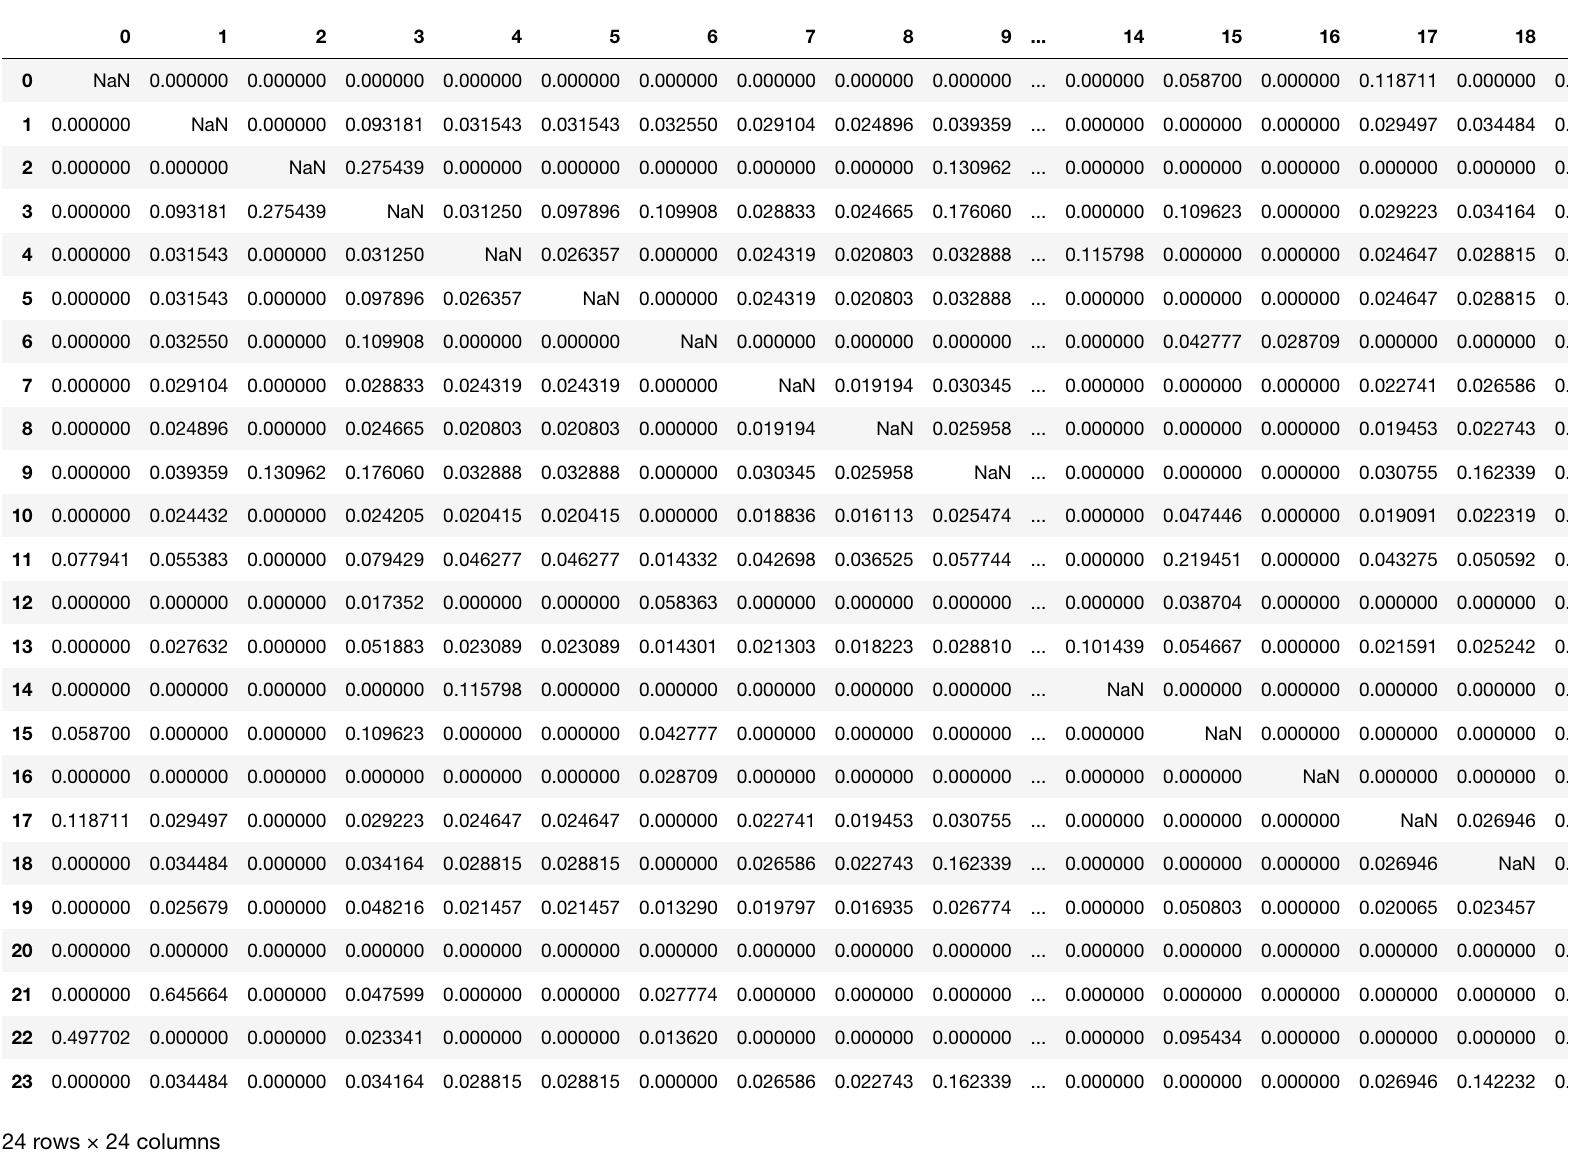

In [109]:
# Data Type Image. 
from IPython.display import Image
Image(filename='/Users/heidinguyen/Downloads/Cosine_similarity_matriz.jpg')


In [90]:
# print all 30 titles: 
for index, doc in enumerate(query_docs1): # 
    print 'Document',index+1 ,':', doc

Document 1 : Little Women (Puffin in Bloom) by Louisa May Alcott
Document 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle
Document 3 : Pride and Prejudice by Jane Austen and Tony Tanner
Document 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith
Document 5 : Winnie-the-Pooh: Classic Gift Edition by A. A. Milne and Ernest H. Shepard
Document 6 : Wuthering Heights (Penguin Classics) by Emily Bront and Pauline Nestor
Document 7 : Anne of Green Gables, Complete 8-Book Box Set: Anne of Green Gables; Anne of the Island; Anne of Avonlea; Anne of Windy Poplar; Anne's House of ... Ingleside; Rainbow Valley; Rilla of Ingleside by L. M. Montgomery
Document 8 : The Wind in the Willows (Sterling Illustrated Classics) by Kenneth Grahame and Robert Ingpen
Document 9 : Denim and Diamonds: A Novel (Debbie Macomber Classics) by Debbie Macomber
Document 10 : Jane Eyre (Bantam 

In [91]:
# Using sklearn.metrics.pairwise.cosine_similarity to compare pairwise similarity of documents in the same document
from sklearn.metrics.pairwise import cosine_similarity
pairwise_similarity = cosine_similarity(tfidf_features, Y=None, dense_output=True)

# Display the matrix of pairwise cosine similarity score
df_pairwise_similarity = pd.DataFrame(pairwise_similarity)


In [92]:
# remove the diagonal value or assign 0 to them: 
# df.values[[np.arange(5)]*2] = 0 #  only work if df has the same number of rows as columns
df_pairwise_similarity_noDiag = df_pairwise_similarity 
np.fill_diagonal(df_pairwise_similarity_noDiag.values, 0) # work for arbitrary shapes

# series of locations of all the max values in each pair column 
series_ix = df_pairwise_similarity_noDiag.idxmax(axis=0, skipna=True) # by column 

# print the pairs and the max values 
for i, doc in enumerate (series_ix): 
    print (i,doc), df_pairwise_similarity_noDiag.iloc[i,doc] # having ',' here will collapse result instead of printing out in rows 
    

(0, 22) 0.4977023708049305
(1, 21) 0.6456636113057035
(2, 3) 0.2754387531198065
(3, 2) 0.2754387531198065
(4, 14) 0.11579813186386644
(5, 3) 0.09789605743240616
(6, 3) 0.10990830466722143
(7, 11) 0.04269827195334832
(8, 11) 0.036525137404137535
(9, 3) 0.17605996144263275
(10, 11) 0.09884310413718839
(11, 15) 0.2194508752563073
(12, 6) 0.058363008215700625
(13, 14) 0.10143880504099567
(14, 4) 0.11579813186386644
(15, 11) 0.2194508752563073
(16, 6) 0.028709360263645563
(17, 0) 0.11871104327744031
(18, 9) 0.16233902602939246
(19, 11) 0.07140077841180971
(20, 0) 0.0
(21, 1) 0.6456636113057035
(22, 0) 0.4977023708049305
(23, 9) 0.16233902602939246


In [93]:
print "Most similar to each other of each pair:\n"

for i, j in enumerate (series_ix):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(i+1, query_docs1[i], j+1, query_docs1[j], df_pairwise_similarity_noDiag.iloc[i,j] )


Most similar to each other of each pair:

Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott and Title 23 : The Annotated Little Women (The Annotated Books) by Louisa May Alcott and John Matteson. Cosine similarity score: 0.50
Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle and Title 22 : The Complete Sherlock Holmes (2 Volumes) by Sir Arthur Conan Doyle. Cosine similarity score: 0.65
Title 3 : Pride and Prejudice by Jane Austen and Tony Tanner and Title 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith. Cosine similarity score: 0.28
Title 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith and Title 3 : Pride and Prejudice by Jane Austen and Tony Tanner. Cosine similarity score: 0.28
Title 5 : Winnie-the-Pooh: Classic Gift Edition by A. A

In [94]:
# Two titles are the most similar
max_match = 0 
max_i = 0
max_j = 0

for i, j in enumerate (series_ix):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    if df_pairwise_similarity_noDiag.iloc[i,j] > max_match:
        max_match = df_pairwise_similarity_noDiag.iloc[i,j]
        max_i = i 
        max_j = j 
    else: 
        continue
print "Two titles are the most similar to each other:\n"
print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(max_i+1, query_docs1[max_i], max_j+1, query_docs1[max_j], df_pairwise_similarity_noDiag.iloc[max_i,max_j] )


Two titles are the most similar to each other:

Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle and Title 22 : The Complete Sherlock Holmes (2 Volumes) by Sir Arthur Conan Doyle. Cosine similarity score: 0.65


In [96]:
df_pairwise_similarity_noDiag

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.058700,0.000000,0.118711,0.000000,0.000000,0.0,0.000000,0.497702,0.000000
1,0.000000,0.000000,0.000000,0.093181,0.031543,0.031543,0.032550,0.029104,0.024896,0.039359,...,0.000000,0.000000,0.000000,0.029497,0.034484,0.025679,0.0,0.645664,0.000000,0.034484
2,0.000000,0.000000,0.000000,0.275439,0.000000,0.000000,0.000000,0.000000,0.000000,0.130962,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.093181,0.275439,0.000000,0.031250,0.097896,0.109908,0.028833,0.024665,0.176060,...,0.000000,0.109623,0.000000,0.029223,0.034164,0.048216,0.0,0.047599,0.023341,0.034164
4,0.000000,0.031543,0.000000,0.031250,0.000000,0.026357,0.000000,0.024319,0.020803,0.032888,...,0.115798,0.000000,0.000000,0.024647,0.028815,0.021457,0.0,0.000000,0.000000,0.028815
5,0.000000,0.031543,0.000000,0.097896,0.026357,0.000000,0.000000,0.024319,0.020803,0.032888,...,0.000000,0.000000,0.000000,0.024647,0.028815,0.021457,0.0,0.000000,0.000000,0.028815
6,0.000000,0.032550,0.000000,0.109908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.042777,0.028709,0.000000,0.000000,0.013290,0.0,0.027774,0.013620,0.000000
7,0.000000,0.029104,0.000000,0.028833,0.024319,0.024319,0.000000,0.000000,0.019194,0.030345,...,0.000000,0.000000,0.000000,0.022741,0.026586,0.019797,0.0,0.000000,0.000000,0.026586
8,0.000000,0.024896,0.000000,0.024665,0.020803,0.020803,0.000000,0.019194,0.000000,0.025958,...,0.000000,0.000000,0.000000,0.019453,0.022743,0.016935,0.0,0.000000,0.000000,0.022743
9,0.000000,0.039359,0.130962,0.176060,0.032888,0.032888,0.000000,0.030345,0.025958,0.000000,...,0.000000,0.000000,0.000000,0.030755,0.162339,0.026774,0.0,0.000000,0.000000,0.162339


In [99]:
df_pairwise_similarity_noDiag = df_pairwise_similarity 
np.fill_diagonal(df_pairwise_similarity_noDiag.values, np.nan) # work for arbitrary shapes

# series of locations of all the min values in each pair column 
series_ix_min = df_pairwise_similarity_noDiag.idxmin(axis=0, skipna=True) # by column 
series_ix_min

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    2
12    0
13    0
14    0
15    1
16    0
17    2
18    0
19    0
20    0
21    0
22    1
23    0
dtype: int64

In [108]:
print " Example of some of the most dissimilar pairs:\n"

for i, j in enumerate (series_ix_min):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    print ("Title {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(i+1, query_docs1[i], j+1, query_docs1[j], df_pairwise_similarity_noDiag.iloc[i,j] )


The most dissimilar pairs:

Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott and Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle. Cosine similarity score: 0.00
Title 2 : The Complete Sherlock Holmes (Knickerbocker Classics) by Arthur Doyle and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 3 : Pride and Prejudice by Jane Austen and Tony Tanner and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 4 : Jane Austen: The Complete Works 7-Book Boxed Set: Classics hardcover boxed set (Penguin Clothbound Classics) by Jane Austen and Coralie Bickford-Smith and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 5 : Winnie-the-Pooh: Classic Gift Edition by A. A. Milne and Ernest H. Shepard and Title 1 : Little Women (Puffin in Bloom) by Louisa May Alcott. Cosine similarity score: 0.00
Title 6 : Wuthering 

## Question 2

2. Now evaluate using a major search engine.
           
        a. I entered "A Tale of Two Cities" into Google search engine and copied the
        capsule of the first organic result and the 20th organic result. 
        
            The 2 capsules are: 
            'A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ...'

            and 

            'Novel by Charles Dickens, published both serially and in book form in 1859. The story is set in the late 18th century against the background of the French ...'
        
        b. I run the same Cosine text similarity calculation on each of these
        capsules in comparison to the original query (book title) in Question 1. 
        
        c. Result: the title and capsule pair are the most similar to each other:

            Capsule 1 : A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ... 
     
                and 
            
            Title 15 : A Tale of Two Cities (Dover Thrift Editions) by Charles Dickens. 
                
            Cosine similarity score: 0.48

In [55]:
# search engine capsules result of "A Tale of Two Cities by Charles Dickens": 
book_query = ['A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ...',
             'Novel by Charles Dickens, published both serially and in book form in 1859. The story is set in the late 18th century against the background of the French ...',
             ]

# pull all the titles into an array: 
arr_query = np.array(book_query)
arr_query

array(['A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ...',
       'Novel by Charles Dickens, published both serially and in book form in 1859. The story is set in the late 18th century against the background of the French ...'],
      dtype='|S167')

In [56]:
# normalize the whole title dataset
norm_arr_query = normalize_corpus(arr_query,lemmatize=True) # # only_text_chars=True, not keep only text characters
# extract features from the title corpus based on on the book title if-idf vector
# query_docs = arr_query 
query_docs_tfidf = tfidf_vectorizer.transform(norm_arr_query)# transform itself 
print query_docs_tfidf.shape

(2, 181)


In [57]:
# Using sklearn.metrics.pairwise.cosine_similarity to compare pairwise similarity of documents in the same document
from sklearn.metrics.pairwise import cosine_similarity
query_similarity = cosine_similarity(tfidf_features, Y=query_docs_tfidf, dense_output=True)# to cotfidf_matrix[0:1] is the Scipy operation to get the first row of the sparse matrix and the resulting array is the Cosine Similarity between the first document with all documents in the set. Note that the first value of the array is 1.0 because it is the Cosine Similarity between the first document with itself. Also note that due to the presence of similar words on the third document (“The sun in the sky is bright”), it achieved a better score.


In [58]:
# find the best match pair
max_match_query = 0 
max_i_query = 0
max_j_query = 0

for i, j in enumerate (series_ix_query):  
#     print 'Title', i+1, ':', query_docs[i], 'and', 'Title', j+1, ':', query_docs[j] , '\nCosine Similarity Score: ', df_pairwise_similarity_noDiag.iloc[i,j] # having ',' here will collapse result instead of printing out in rows 
    if df_query_similarity_noDiag.iloc[j,i] > max_match_query:
        max_match_query = df_query_similarity_noDiag.iloc[j,i]
        max_j_query  = j
        max_i_query = i 
#         print i, j
    else: 
        continue

print max_i_query, max_j_query, max_match_query
print "The two title and capsule are the most similar to each other:\n"
print ("Capsule {0} : {1} and Title {2} : {3}. Cosine similarity score: {4:.2f}").format(max_i_query+1, query_docs[max_i_query], max_j_query+1, arr_title[max_j_query], df_query_similarity_noDiag.iloc[max_j_query,max_i_query] )


0 14 0.480807555469275
The two title and capsule are the most similar to each other:

Capsule 1 : A Tale of Two Cities (1859) is a historical novel by Charles Dickens, set in London and Paris before and during the French Revolution. The novel tells the story of ... and Title 15 : A Tale of Two Cities (Dover Thrift Editions) by Charles Dickens. Cosine similarity score: 0.48
